In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import parallel_coordinates

# Import permutations from the itertools module
from itertools import permutations

# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori, association_rules




In [96]:
# Funtion to compute Zhang's rule from mlxtend association_rules output
def zhangs_rule(rules):
    PAB = rules['support'].copy()
    PA = rules['antecedent support'].copy()
    PB = rules['consequent support'].copy()
    NUMERATOR = PAB - PA*PB
    DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
    return NUMERATOR / DENOMINATOR

In [14]:
books_names=pd.read_csv("../KPIs_and_Exploratory/data/books.csv")
books_names.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [17]:
ratings = pd.read_csv('../KPIs_and_Exploratory/data/ratings.csv')
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [19]:
book_data=pd.merge(ratings,books_names,on='book_id')
book_data.head()

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
1,11,258,3,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
2,143,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
3,242,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
4,325,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...


In [45]:
#create a dataframe for analysis
trend=pd.DataFrame(book_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(book_data.groupby('title')['rating'].count()) 
trend.sort_values(['rating', 'total number of ratings'], ascending=False, inplace= True) 

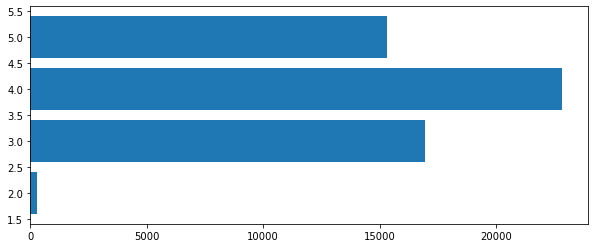

In [46]:
#plot rounded-up ratings with number of books
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'])
plt.show()

In [49]:
trend.head(15)

,rating,total number of ratings
title,,
The Complete Calvin and Hobbes,4.829876,482
ESV Study Bible,4.818182,88
Attack of the Deranged Mutant Killer Monster Snow Goons,4.768707,147
The Indispensable Calvin and Hobbes,4.766355,214
The Revenge of the Baby-Sat,4.761364,176
There's Treasure Everywhere: A Calvin and Hobbes Collection,4.760456,263
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,4.757202,243
It's a Magical World: A Calvin and Hobbes Collection,4.747396,384
"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",4.736842,285


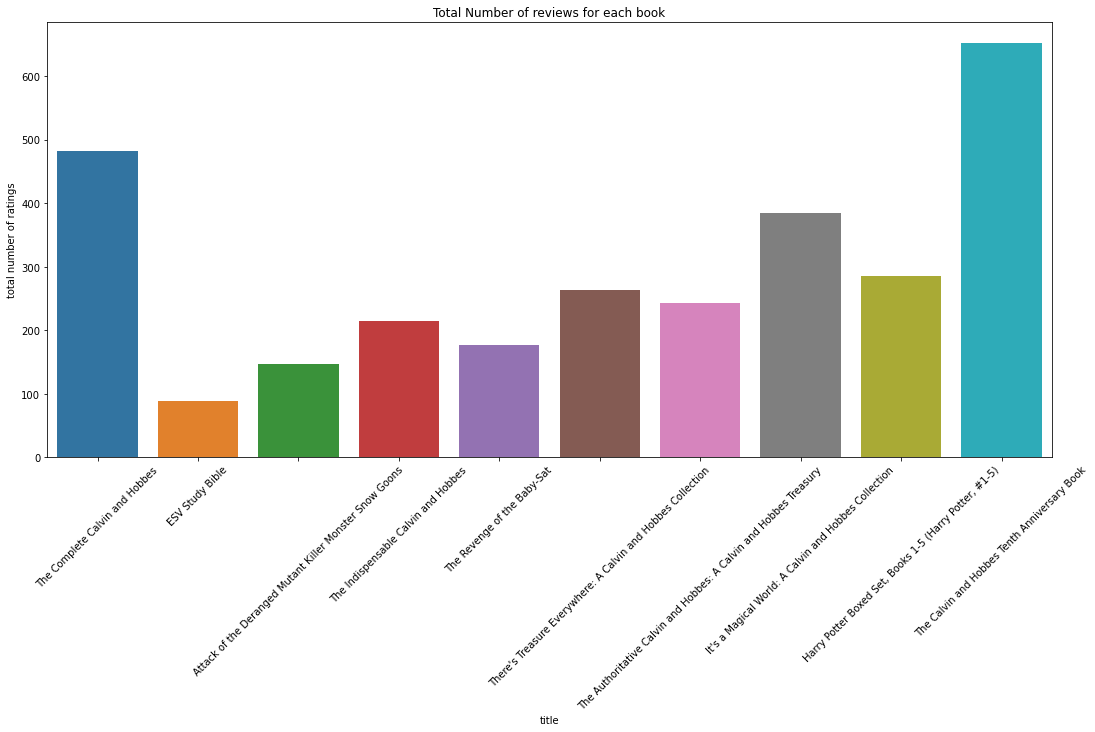

In [64]:
#a bar graph descibibg number of reviews for first 10 books
plt.figure(figsize =(18, 8))
sns.barplot(x = trend.head(10).index,y = trend['total number of ratings'].head(10), data = trend.head(10))
plt.title("Total Number of reviews for each book")
plt.xticks(rotation= 45)
plt.show();

In [54]:
# Calculate mean rating of all books and check the popular high rating 
book_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
The Complete Calvin and Hobbes                             4.829876
ESV Study Bible                                            4.818182
Attack of the Deranged Mutant Killer Monster Snow Goons    4.768707
The Indispensable Calvin and Hobbes                        4.766355
The Revenge of the Baby-Sat                                4.761364
Name: rating, dtype: float64

# Recomendation System

**Metrics of Market Basket Analysis:**

- Support:
Percentage of orders that contain the item set. 

- Confidence:
Given two items, X and Y, confidence measures the percentage of times that item Y is purchased, given that item X was purchased

- Lift:

Lift is used to measure how much more often the rule X->Y occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

In summary, lift can take the following values:

    Lift = 1; implies no relationship between X and Y (i.e., X and Y occur together only by chance)
    Lift > 1; implies that there is a positive relationship between X and Y (i.e., X and Y occur together more often than random)
    Lift < 1; implies that there is a negative relationship between X and Y (i.e., X and Y occur together less often than random)

- Leverage: 

Leverage also builds on support.It measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells.

    Leverage(X → Y ) = Support(X&Y ) − Support(X)Support(Y )

Leverage lies in -1 and +1 range.

- Conviction:

Conviction is also built using support.It compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y.

       Conviction(X → Y ) =Support(X&Y ) / Support(X)Support(Y )
       
. If conviction is greater than 1, then this metric shows that incorrect predictions ( X \Rightarrow Y ) occur less often than if these two actions were independent.

- Zhang:

It is a metric that ranges from -1 to 1 to represent both positive association and perfect disassociation
Takes values between -1 and +1

Value of +1 indicates perfect association

Value of -1 indicates perfect dissociatio

In [20]:
# Recover unique user IDs.
user_id = book_data['user_id'].unique()
# Create library of highly rated movies for each user.
libraries = [list(book_data[book_data['user_id'] == u].title) for u in user_id]

In [26]:
libraries[1]

['The Shadow of the Wind (The Cemetery of Forgotten Books,  #1)',
 'The Da Vinci Code (Robert Langdon, #2)',
 'Memoirs of a Geisha',
 "The Memory Keeper's Daughter",
 'The Catcher in the Rye',
 'Slaughterhouse-Five',
 'Life of Pi',
 'A Prayer for Owen Meany',
 'The Book Thief',
 'Where the Sidewalk Ends',
 'Night (The Night Trilogy #1)',
 'A Heartbreaking Work of Staggering Genius',
 'The Kite Runner',
 'A Confederacy of Dunces',
 'Me Talk Pretty One Day',
 'Dress Your Family in Corduroy and Denim',
 'The Glass Castle',
 'In Cold Blood',
 "The Handmaid's Tale",
 'The Metamorphosis',
 'Everything Is Illuminated',
 'Bel Canto',
 'One Hundred Years of Solitude',
 "Portnoy's Complaint",
 'Cloud Atlas',
 'Guns, Germs, and Steel: The Fates of Human Societies',
 'The Amazing Adventures of Kavalier & Clay',
 'A Man in Full',
 'Kitchen Confidential: Adventures in the Culinary Underbelly',
 'The Plot Against America',
 'Love in the Time of Cholera',
 'The Human Stain (The American Trilogy, #3)',

In [56]:
# Instantiate transaction encoder.
encoder = TransactionEncoder()
# One-hot encode libraries.
onehot = encoder.fit(libraries).transform(libraries)
# Use movie titles as column headers.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
# Print onehot header.
onehot.head()


,"Angels (Walsh Family, #3)","""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",#GIRLBOSS,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",1/4 جرام,"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,...,محال,مخطوطة بن إسحاق: مدينة الموتى,نادي السيارات,هشت کتاب,هيبتا,واحة الغروب,يوتوبيا,ڤيرتيجو,キスよりも早く1 [Kisu Yorimo Hayaku 1] (Faster than a Kiss #1),美少女戦士セーラームーン新装版 1 [Bishōjo Senshi Sailor Moon Shinsōban 1]
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [2]:
#onehot.to_csv('../KPIs_and_Exploratory/data/onehot_books.csv',  index=False)
onehot = pd.read_csv('../KPIs_and_Exploratory/data/onehot_books.csv')
onehot.head()

,"Angels (Walsh Family, #3)","""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",#GIRLBOSS,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",1/4 جرام,"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,...,محال,مخطوطة بن إسحاق: مدينة الموتى,نادي السيارات,هشت کتاب,هيبتا,واحة الغروب,يوتوبيا,ڤيرتيجو,キスよりも早く1 [Kisu Yorimo Hayaku 1] (Faster than a Kiss #1),美少女戦士セーラームーン新装版 1 [Bishōjo Senshi Sailor Moon Shinsōban 1]
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## HeatMap

**Preparing the data**

1. Generate the rules.

Use Apriori algorithm and association rules.

2. Convert antecedents and consequents into strings.

Stored as frozen sets by default in mlxtend.

3. Convert rules into matrix format.

Suitable for use in heatmaps

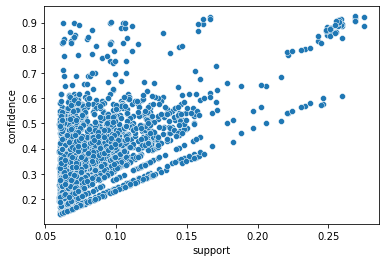

In [5]:
# Apply the apriori algorithm
frequent_itemsets = apriori(onehot, min_support=0.06,use_colnames=True, max_len=2)

# Recover the association rules
#rules = association_rules(frequent_itemsets)


# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric = 'support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.show()

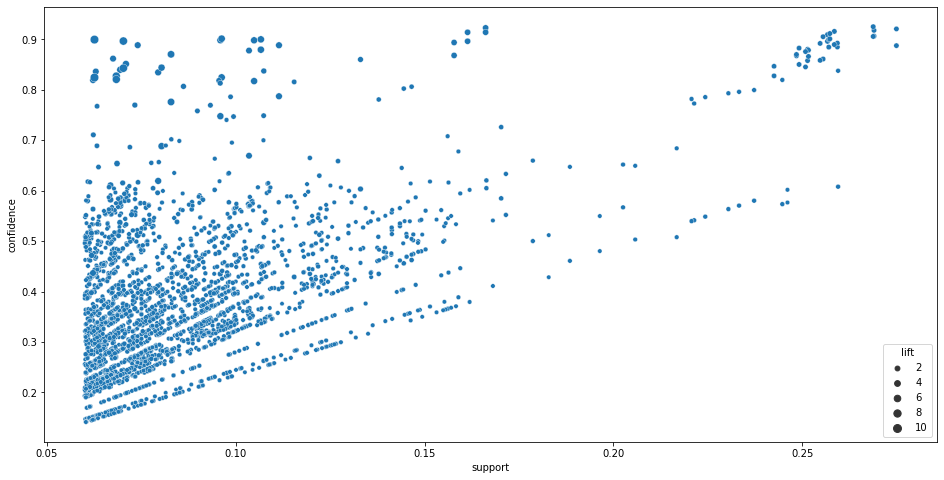

In [12]:
plt.figure(figsize =(16, 8))

sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules);

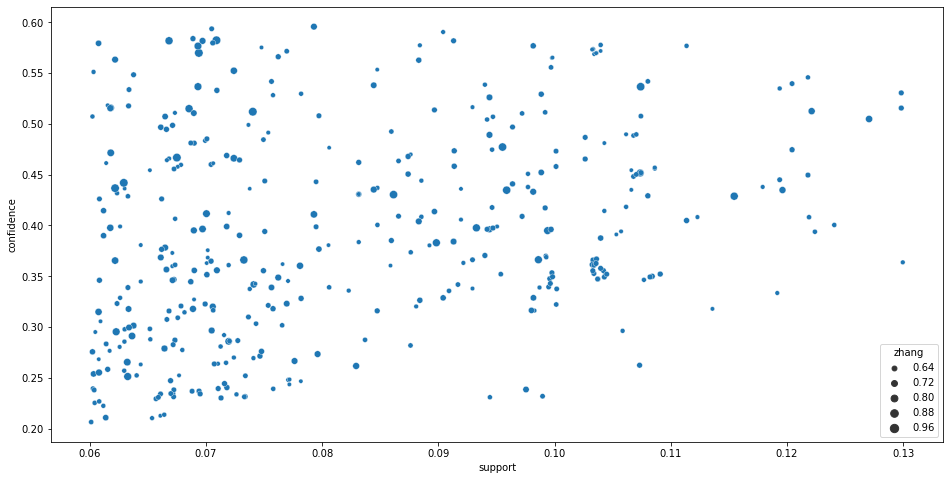

In [114]:
plt.figure(figsize =(16, 8))

sns.scatterplot(x = "support", y = "confidence", 
                size = "zhang", data = rules_prunned);

In [102]:
# Compute Zhang's rule
rules['zhang'] = zhangs_rule(rules)

In [106]:
rules_prunned = rules[rules.support <= 0.13][rules.confidence < 0.6][rules.confidence > 0.2][rules['zhang'] > 0.6]

C:\Users\taiz_\AppData\Local\Temp\ipykernel_8732\2790870302.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rules_prunned = rules[rules.support <= 0.13][rules.confidence < 0.6][rules.confidence > 0.2][rules['zhang'] > 0.6]


In [100]:
# Heatmap

# Convert antecedents and consequents into strings
rules_prunned['antecedents'] = rules_prunned['antecedents'].apply(lambda a: list(a)[0].replace('#1','').replace(', ', ''))

rules_prunned['consequents'] = rules_prunned['consequents'].apply(lambda a: list(a)[0].replace('#1','').replace(', ', ''))


In [105]:
rules_prunned[['antecedents','consequents']]

,antecedents,consequents
7,1984,Brave New World
8,Catch-22,1984
9,1984,Catch-22
15,1984,Ender's Game (Ender's Saga)
16,Fahrenheit 451,1984
...,...,...
2647,Water for Elephants,The Time Traveler's Wife
2653,To Kill a Mockingbird,Where the Sidewalk Ends
2657,To Kill a Mockingbird,Wuthering Heights
2666,Where the Wild Things Are,Where the Sidewalk Ends


In [108]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules_prunned.pivot(index='consequents', columns='antecedents',values='support')


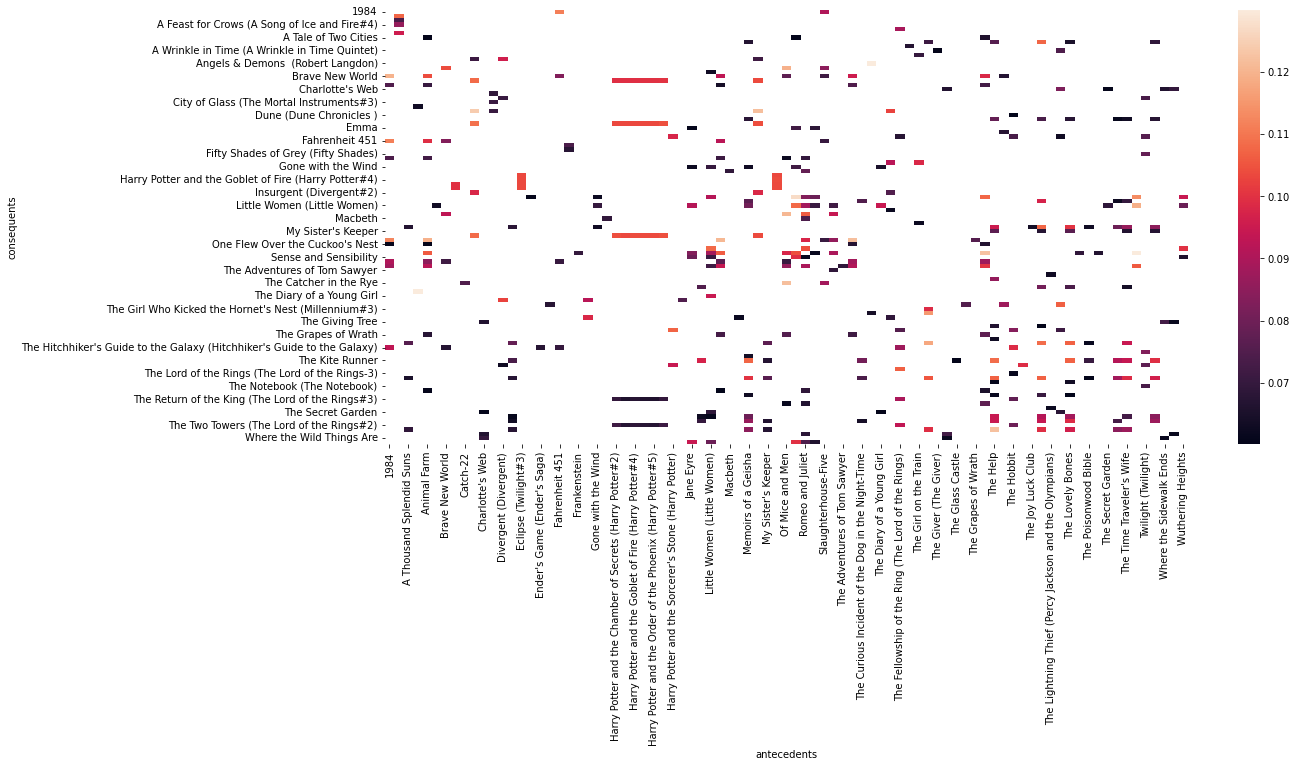

In [109]:
plt.figure(figsize =(18, 8))

sns.heatmap(support_table);

In [111]:
#Parallel coordinate plots
# Convert rules to coordinates.



rules_prunned['rule'] = rules_prunned.index

coords = rules_prunned[['antecedents','consequents','rule']]
coords.head()


,antecedents,consequents,rule
7,1984,Brave New World,7
9,1984,Catch-22,9
16,Fahrenheit 451,1984,16
17,1984,Fahrenheit 451,17
19,1984,Frankenstein,19


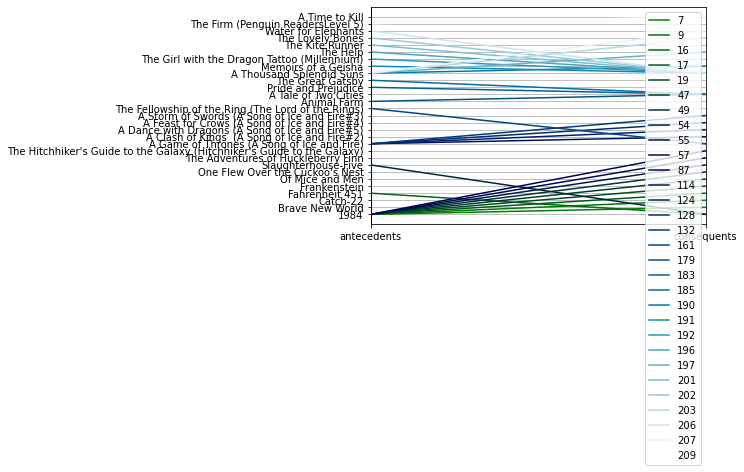

In [112]:

# Generate parallel coordinates plot
parallel_coordinates(coords[0:30],'rule', colormap = 'ocean');

In [120]:
rules_prunned.sort_values(['lift','zhang'], ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang,rule
658,City of Bones (The Mortal Instruments),City of Glass (The Mortal Instruments#3),0.121743,0.083315,0.070904,0.582411,6.990500,0.060761,2.195185,0.975738,658
654,City of Bones (The Mortal Instruments),City of Ashes (The Mortal Instruments#2),0.121743,0.082641,0.069388,0.569957,6.896802,0.059327,2.133180,0.973525,654
883,Fifty Shades of Grey (Fifty Shades),Fifty Shades Darker (Fifty Shades#2),0.144579,0.083333,0.074030,0.512040,6.144485,0.061982,1.878571,0.978761,883
885,Fifty Shades of Grey (Fifty Shades),Fifty Shades Freed (Fifty Shades#3),0.144579,0.078336,0.067498,0.466857,5.959700,0.056172,1.728736,0.972862,885
2132,The Lightning Thief (Percy Jackson and the Oly...,The Battle of the Labyrinth (Percy Jackson and...,0.142370,0.075266,0.062931,0.442019,5.872780,0.052215,1.657288,0.967461,2132
2585,The Lightning Thief (Percy Jackson and the Oly...,The Sea of Monsters (Percy Jackson and the Oly...,0.142370,0.075921,0.062182,0.436760,5.752833,0.051373,1.640650,0.963321,2585
209,The Firm (Penguin ReadersLevel 5),A Time to Kill,0.114836,0.109389,0.066824,0.581907,5.319611,0.054262,2.130175,0.917363,209
777,Sense and Sensibility,Emma,0.133086,0.104859,0.068546,0.515049,4.911815,0.054591,1.845838,0.918672,777
981,Hamlet,Macbeth,0.129137,0.120189,0.069313,0.536744,4.465821,0.053793,1.899191,0.891158,981
980,Macbeth,Hamlet,0.120189,0.129137,0.069313,0.576701,4.465821,0.053793,2.057326,0.882096,980


# Inference:

By performing the association analysis using the apriori algorithm on the books dataset, we were able to find out the books preferred by certain users.


    Users who read Sense and Sensibility is 4.91 times more likely to read Emma, since the lift is high for these two books.
    
    Similarly, a user who read City of Bones (The Mortal Instruments) is 6.99 times more likely to read City of Glass (The Mortal Instruments#3), confirming the positive association with a zhang close to 1